# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df_temp = df['temperature']
df_hr = df['heart_rate']

Question 1: Is the distribution of body temperatures normal?
Question 2: Is the sample size large? Are the observations independent?

Central Limit Theorem = distribution of averages will closely approximate a normal distribution when number of observations is sufficiently large, generally >30.

In [7]:
temp_mean = np.mean(df_temp)
temp_std = np.std(df_temp)
temp_len = len(df_temp)

print('The average temp is:', temp_mean)
print('The standard deviation of temp is:', temp_std)
print('The length of temp data is:', temp_len)

The average temp is: 98.24923076923078
The standard deviation of temp is: 0.7303577789050377
The length of temp data is: 130


# The sample size is indeed large, at 130 total, which is >30. Observations are also independent since they were taken from different individuals. 

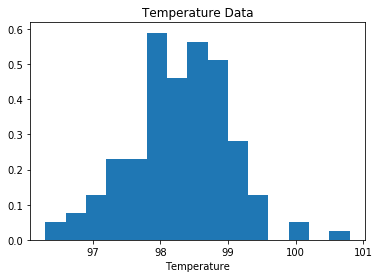

In [8]:
#plot temperature histogram to see if normally distributed
plt.hist(df_temp, density=True, bins=15)
plt.xlabel('Temperature')
plt.title('Temperature Data')
plt.show()

The parent temperature data looks normally distributed, but the central limit theorem says 'distribution of averages'. Since I've established that the sample size is >30, this means that I can treat the temperature mean as normal distribution. 

Next, I generate a random normal distribution of the temp mean and standard deviation.

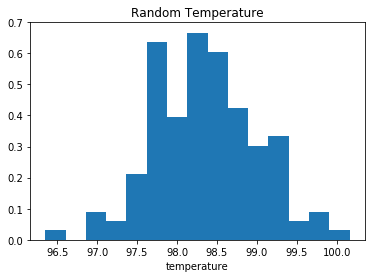

In [9]:
temp_norm = np.random.normal(temp_mean, temp_std, 130)
_ = plt.hist(temp_norm, density=True, bins=15)
_ = plt.xlabel('temperature')
_ = plt.title('Random Temperature')
plt.show()

In [10]:
normal_range = (temp_mean-3*temp_std, temp_mean+3*temp_std)
print(normal_range)

(96.05815743251567, 100.44030410594588)


# Yes, the body temperature is normally distributed.
The histogram of temperature averages have the signature bell-curve and the normal range shows that the range of temperature mean is within 3sd.

Question 3: Is the true population mean really 98.6 degrees F?

Null hypothesis: the true population mean is 98.6 degrees F

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Generate bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    for i in range(size):
        # Generate replicate sample
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

0.06405661469519336
0.06398920576386274
[98.08615385 98.40923077]
P value: 0.0


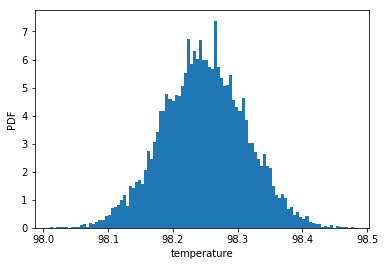

In [12]:
#Take 10000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df_temp, np.mean, 10000)

#calculate and print SEM
sem = np.std(df_temp) / np.sqrt(len(df_temp))
print(sem)

#calculate and print std of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

#calculate 99% confidence interval of temperature
bs_CI = np.percentile(bs_replicates, [0.5, 99.5])
print(bs_CI)

#find probability of temperature greater than 98.6 degrees f
p = np.sum(bs_replicates >= 98.6)/len(bs_replicates)
print('P value:', p)

#histogram of results
_ = plt.hist(bs_replicates, bins=100, density=True)
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')
plt.show()

Bootstrap hypothesis testing reveals that the p-value <0.5 and the true temperature mean is between 98.1 and 98.4, which is less than 98.6. From this testing, we can conclude that the null hypothesis is incorrect.

Next, I use one sample hypothesis testing to determine if my null hypothesis is true or not. One sample hypothesis test is used here because I am comparing the sample data to a single temperature data

In [13]:
#set temperature mean by 98.6
temp_set = df_temp-np.mean(df_temp)+98.6

#take replicates of set temperatures: bs_replicates
bs_replicates = draw_bs_reps(temp_set, np.mean, 10000)

#calculate p-value
p = np.sum(bs_replicates <= np.mean(df_temp))/10000
print('p = ', p)

p =  0.0


The one sample hypothesis test also reveals a p value <0.5, indicating that 98.6 degrees F is not likely to be the true mean temperature. 

This can also be examined using t-statistics due to the sample size being not too large.

Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [14]:
sample = np.random.choice(df_temp, size=10)

0.3065941943351179
0.2286591349585683
[97.75665 98.5955 ]
P value: 0.1


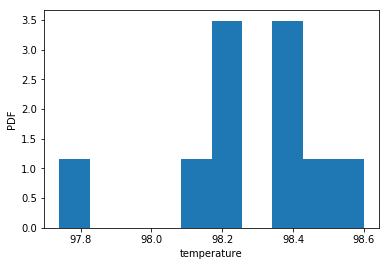

In [19]:
#bootstrap testing
#Take 10 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(sample, np.mean, 10)

#calculate and print SEM
sem = np.std(sample) / np.sqrt(len(sample))
print(sem)

#calculate and print std of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

#calculate 99% confidence interval of temperature
bs_CI = np.percentile(bs_replicates, [0.5, 99.5])
print(bs_CI)

#find probability of temperature greater than 98.6 degrees f
p = np.sum(bs_replicates >= 98.6)/len(bs_replicates)
print('P value:', p)

#histogram of results
_ = plt.hist(bs_replicates, density=True)
_ = plt.xlabel('temperature')
_ = plt.ylabel('PDF')
plt.show()

In [18]:
#set temperature mean by 98.6
temp_set = df_temp-np.mean(df_temp)+98.6

#take replicates of set temperatures: bs_replicates
bs_replicates = draw_bs_reps(temp_set, np.mean, 10)

#calculate p-value
p = np.sum(bs_replicates <= np.mean(df_temp))/10
print('p = ', p)

p =  0.0


The p-value increased with the bootstrap approach 0.0 to 0.1; whereas the one sample testing remained at 0.0. For such a small sample size, t-test needs to used.

Question 5: At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [36]:
#calculate population of statistics using bootstrap
def bs_rep_ci(data, perc, size=1):
    
    """Generate replicates for each end"""
    bs_rep_start = np.empty(size)
    bs_rep_end = np.empty(size)
#set start and end at 50% each
    start = (100-perc)/2
    end = perc+(100-perc)/2
    
    for i in range(size):
        bs_data = np.random.choice(data, size=len(data))
        bs_rep_start[i], bs_rep_end[i] = np.percentile(bs_data, [start, end])
        
    return bs_rep_start, bs_rep_end

#take 10000 replicates of the sample: bs_rep_ci
bs_rep_start, bs_rep_end = bs_rep_ci(df_temp, 95, 1000)
print('Normal temperature range with 95% confidence is:', np.mean(bs_rep_start), 'to', np.mean(bs_rep_end))

#calculate margin of error
temp_stdv = np.std(df_temp)

#use t value at 95% CI from t-table:1.98
t = 1.98
margin_of_error=t*(temp_stdv/np.sqrt(len(df_temp)))
print('margin of error = ', margin_of_error)

Normal temperature range with 95% confidence is: 96.77444 to 99.581795
margin of error =  0.12683209709648285


In [26]:
#calculate confidence interval from frequentist method
start = temp_mean - t * temp_std
end = temp_mean + t * temp_std
print('95% confidence interval = ', start, end)

95% confidence interval =  96.8031223669988 99.69533917146275


# The normal temperature is between 96.8 and 99.6; anything not within that range is considered abnormal

Question 6: Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [43]:
temp_m = df[df['gender']=='M'].temperature
temp_f = df[df['gender']=='F'].temperature

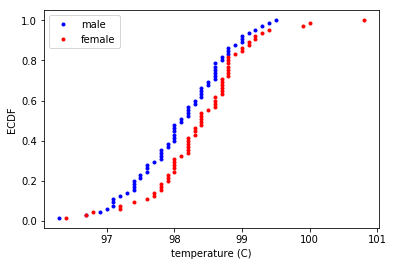

In [45]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_m, y_m = ecdf(temp_m)
x_f, y_f = ecdf(temp_f)

_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='red')
_ = plt.xlabel('temperature (C)')
_ = plt.ylabel('ECDF')
_ = plt.legend(['male','female'])
plt.show()

The ecdf plot visually shows a difference in the distribution of males and females.

From here I'll use the permutation then two sample t-test to determine if the null hypothesis is true. I used permutation and two sample t-test because there are two separate data sets. 

Null hypothesis: females have the same normal body temperature males do

In [46]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1, data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [47]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [50]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(temp_f, temp_m)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(temp_f, temp_m,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0138


In [52]:
#two sample t-test
temp_f_mean = np.mean(temp_f)
temp_f_std = np.std(temp_f)
nf = len(temp_f)

temp_m_mean = np.mean(temp_m)
temp_m_std = np.std(temp_m)
nm = len(temp_m)

t = (temp_f_mean-temp_m_mean) / np.sqrt(((temp_f_std**2)/nf)+((temp_m_std**2)/nm))
print('t statistics:', t)

t statistics: 2.3032202891940123


From the t-table we see that a t value of 2.3 gives a p-value of 0.01-0.025. This p-value agrees with the permutation method above. Since is it less than 0.5, we can reject the null hypothesis and conclude:

# The female body temperature is different from the male body temperature.

# Conclusion

From the EDA above we found that the true normal body temperature range is between 96.8 - 99.6 with a 95% confidence. As we test Carl Wunderlich claim that the true normal body temperature is 98.6, we found that the alternate true normal temperature is actually between 98.1-98.4. With a p-value of 0.1, we rejected Wunderlich's hypothesis. 